# ANOVA

## Noms groupe  : 
1. OISSAFE Imad 
2. LATRACH EL Habib
3. ENNASTY Hamza

### Imporation des bibliothèques:

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import shapiro
import statsmodels.api as sm

### Imporation des données:
#### Objectif :
- Déterminer s'il existe des différences significatives dans le total des citations entre différents groupes de chercheurs, classés selon leur expérience. (Les années d'expérience sont calculées à partir de première et dérnière année des citations).
- On veut étudier l'influence de nombre des années sur le nombre total de citations.

In [24]:
df = pd.read_excel('anova_data.xlsx')
df

,Nom,Nombre total de citations,Nombre de coauteurs,Années d'expérience,groupe
0,Aziz Ouaarab,751,3,10,10-20
1,Essaid El Bachari,433,2,12,10-20
2,GAMRANI,2129,0,39,30-40
3,Hajar Mousannif,2928,9,11,10-20
4,HAMZA LAMSYEHE,285,0,4,0-10
5,Hassan Chehouani,520,8,11,10-20
6,HIBA ASRI,990,0,7,0-10
7,IBNELOUAD Aouatif,57,0,5,0-10
8,Jabrane Amaghouss,216,0,11,10-20
9,Khalid OUFDOU,2983,6,24,20-30


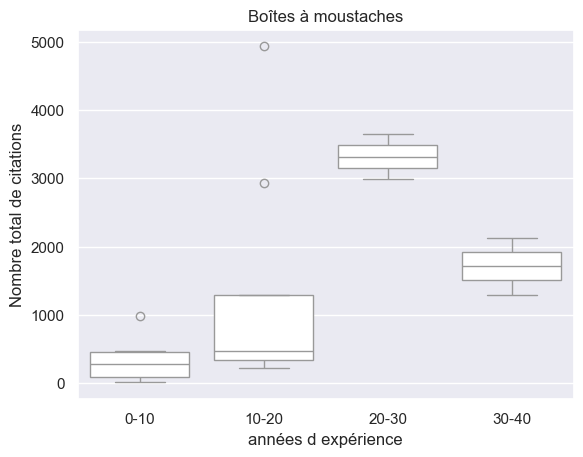

In [23]:
# Les boîtes à moustaches
sns.set()

data_sorted = df.sort_values(by=['groupe'])
ax = sns.boxplot(x="groupe", y="Nombre total de citations", data=data_sorted, color='white')
plt.xlabel('années d expérience')
plt.ylabel('Nombre total de citations')
plt.title('Boîtes à moustaches')
plt.show()

Les boîtes à moustaches montre que les moyennes sont clairement distinctes, cela suggère que lenombre total de citations est significativement différent entre les différents groupes.

In [29]:
# Effectuer l'ANOVA
anova = smf.ols('Q("Nombre total de citations") ~ groupe', data=df).fit()

In [27]:
sm.stats.anova_lm(anova, typ=2)

,sum_sq,df,F,PR(>F)
groupe,1.901513e+07,3.0,4.629918,0.016276
Residual,2.190407e+07,16.0,NaN,NaN


Dans ce cas, la p-valeur pour le `groupe` est 0,016276, ce qui est inférieur à 0,05. Cela suggère qu'il y a une différence significative entre les moyennes des groupes.